In [2]:
%matplotlib inline

In [3]:
import math
import os, sys, argparse, csv
import inspect
import numpy as np
import imageio
import matplotlib.pyplot as plt
from multiprocessing import Pool
from tqdm import tqdm
import glob
from pathlib import Path
import json

In [1]:
!pip install imageio

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 3.4 MB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 54.3 MB/s eta 0:00:01
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.2.0
    Uninstalling Pillow-8.2.0:
      Successfully uninstalled Pillow-8.2.0


In [4]:
def represents_int(s):
    try: 
        int(s)
        return True
    except ValueError:
        return False

In [5]:
def read_label_mapping(filename, label_from='raw_category', label_to='nyu40id'):
    assert os.path.isfile(filename)
    mapping = dict()
    
    with open(filename) as csvfile:
        reader = csv.DictReader(csvfile, delimiter='\t')
        for row in reader:
            mapping[row[label_from]] = int(row[label_to])
    #import pdb; pdb.set_trace()
    # if ints convert 
    if represents_int(list(mapping.keys())[0]):
        mapping = {int(k):v for k,v in mapping.items()}
    return mapping

In [6]:
def map_label_image(image, label_mapping):
    mapped = np.copy(image)
    for k,v in label_mapping.items():
        mapped[image==k] = v
    return mapped.astype(np.uint8)

In [7]:
def visualize_label_image(filename, image):
    height = image.shape[0]
    width = image.shape[1]
    vis_image = np.zeros([height, width, 3], dtype=np.uint8)
    color_palette = create_color_palette()
    for idx, color in enumerate(color_palette):
        vis_image[image==idx] = color
    imageio.imwrite(filename, vis_image)

In [8]:
def process_image(input_file):
    
    image = np.array(imageio.imread(input_file))
    #print(label_map)
    mapped_image = map_label_image(image, updated_label_map)
    scene = input_file.replace("/ds-av/public_datasets/scannet/raw/scans/", "").replace("/label", "").split("/")[0]
    output_file = f"/netscratch/gautam/scannet/scans/{scene}/annotation/segmentation/{Path(input_file).name.split('.')[0]}_labelId.{Path(input_file).name.split('.')[1]}"
    imageio.imwrite(output_file, mapped_image)
    # uncomment to save out visualization
    # util.visualize_label_image(os.path.splitext(opt.output_file)[0] + '_vis.jpg', mapped_image)

In [9]:
label_map_file = "/ds-av/public_datasets/scannet/raw/scannetv2-labels.combined.tsv"

In [10]:
label_map = read_label_mapping(label_map_file, label_from='id', label_to='nyu40id')

In [11]:
valid_label_ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16, 24, 28, 33, 34,36,39]

In [12]:
updated_label_map = {}
                     
for k, v in label_map.items():
    if v in valid_label_ids:
        updated_label_map[k] = v
    else:
        updated_label_map[k] = 0

In [13]:
def main():
#     searchImg = os.path.join("/ds-av/public_datasets/scannet/pre/scans/*/frame/color", "*.jpg")
    searchLabel = os.path.join("/netscratch/gautam/scannet/scans/*/annotation/segmentation/", "*.png")
    files = glob.glob(searchLabel)
    new_files = []
    #import pdb;pdb.set_trace()
    for file in files:
        filename = Path(file).name
        scene_name = file.replace("/netscratch/gautam/scannet/scans/", "").replace("/annotation/segmentation", "").split("/")[0]
        new_file = f"/ds-av/public_datasets/scannet/raw/scans/{scene_name}/label/{filename}"
        try:
            if not Path(new_file).is_file():
                raise ValueError(f"File {new_file} not found")
            else:
                new_files.append(new_file)
        except:
            print(f"File {new_file} not found")
        
    if not new_files:
        print("Did not find any files.")
    tqdm.write(
        "Processing {} files for remapping".format(len(files)))
    
    
#     for i in new_files:
#         print(i)
#         break
    
    progress = 0
    try:
        tqdm.write("Progress: {:>3} %".format(
            progress * 100 / len(new_files)), end=' ')
    except ZeroDivisionError:
        print("no data")

    pool = Pool(12)
    results = list(
        tqdm(pool.imap(process_image, new_files), total=len(new_files)))
    pool.close()
    pool.join()

In [14]:
main()

File /ds-av/public_datasets/scannet/raw/scans/scene0468_00/label/470_labelId.png not found
File /ds-av/public_datasets/scannet/raw/scans/scene0468_00/label/931_labelId.png not found
File /ds-av/public_datasets/scannet/raw/scans/scene0468_00/label/1573_labelId.png not found
File /ds-av/public_datasets/scannet/raw/scans/scene0468_00/label/892_labelId.png not found
File /ds-av/public_datasets/scannet/raw/scans/scene0468_00/label/10_labelId.png not found
File /ds-av/public_datasets/scannet/raw/scans/scene0468_00/label/963_labelId.png not found
File /ds-av/public_datasets/scannet/raw/scans/scene0468_00/label/720_labelId.png not found
File /ds-av/public_datasets/scannet/raw/scans/scene0468_00/label/1625_labelId.png not found
File /ds-av/public_datasets/scannet/raw/scans/scene0468_00/label/382_labelId.png not found
File /ds-av/public_datasets/scannet/raw/scans/scene0468_00/label/203_labelId.png not found
File /ds-av/public_datasets/scannet/raw/scans/scene0468_00/label/1557_labelId.png not fou

/tmp/ipykernel_3007067/3497703608.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = np.array(imageio.imread(input_file))
/tmp/ipykernel_3007067/3497703608.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = np.array(imageio.imread(input_file))
/tmp/ipykernel_3007067/3497703608.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = np.array(imageio.imread(input

In [35]:
label_map_file = "/ds-av/public_datasets/scannet/raw/scannetv2-labels.combined.tsv"

In [3]:
import json

In [2]:
with open("/ds-av/public_datasets/scannet/pre/scannet_train.json") as fp:
    data = json.load(fp)

In [6]:
"/ds-av/public_datasets/scannet/pre/scans/" + data["images"][0]["file_name"]

'/ds-av/public_datasets/scannet/pre/scans/scene0150_00/frame/color/428.jpg'

In [16]:
one_img.shape

AttributeError: 'str' object has no attribute 'shape'

In [17]:
one_img = "/ds-av/public_datasets/scannet/raw/scans/scene0356_01/label/937.png"

In [21]:
np.array(Image.open(one_img)).shape

(968, 1296)

In [21]:
Path(one_img).name.split(".")[0] + "_labelId." + Path(one_img).name.split(".")[1]

'937_labelId.png'

In [115]:
p_one =Path(one_img)


In [118]:
p_one.name


'937.png'

In [18]:
from pathlib import Path

In [125]:
process_image(one_img)

/tmp/ipykernel_1782041/1419295387.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = np.array(imageio.imread(input_file))


In [93]:
np.unique(img)

array([ 0,  1,  3, 11], dtype=uint16)

In [94]:
np.unique(mapped_img)

array([0, 1, 2, 4], dtype=uint8)

In [20]:
from PIL import Image

In [134]:
pic = Image.open(one_img)

In [135]:
pic_ar = np.array(pic)

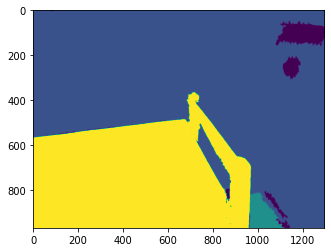

In [133]:
plt.imshow(pic_ar)

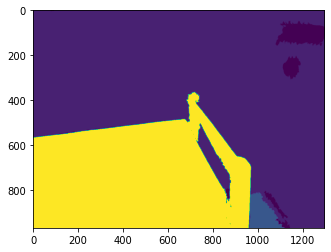

In [136]:
plt.imshow(pic_ar)

In [ ]:
searchLabel = os.path.join("/netscratch/gautam/scannet/scans/*/annotation/segmentation/", "*.png")
files = glob.glob(searchLabel)